# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier apperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de conusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification de nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import cv2 
import math
import pandas

import operator
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
# Pour RNC
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
X.shape

(5000, 400)

In [ ]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape

(5000,)

Afficher aléatoirement quelques données de notre base

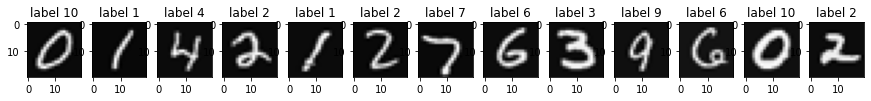

In [ ]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

- Matrice de conusion

In [ ]:
def my_confusion_matrix(Yreel, ypred):
  size = len(np.unique(Yreel))
  matrix = np.zeros([size, size], dtype = int)
  for i in range(len(Yreel)):
    matrix[Yreel[i]-1][ypred[i]-1] += 1
  return matrix


In [ ]:
def true_false(confusion_matrix):
  FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
  FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
  TP = np.diag(confusion_matrix)
  TN = confusion_matrix.sum() - (FP + FN + TP)

  return FP, FN, TP, TN

- Rappel


In [ ]:
def rappel(TP,FN):
  return TP/(TP+FN)

- Précision

In [ ]:
def precision(TP,FP):
  return TP/(TP+FP)

- Taux de FP

In [ ]:
def taux_fp(TP,FP):
  return FP/(TP+FP)

- Spécificité

In [ ]:
def specificite(TN,FP):
  return TN/(TN+FP)

- Courbe ROC

In [ ]:
def roc_curve(Xtt , Ytt ,classe):


  if(classe==0):
    classe=10
  actualClass=[]
  predictedClass=[]

  for i in range(len(Ytt)):

    if(Ytt[i]==classe):
      actualClass.append(1)
    else:
      actualClass.append(0)
    predictedClass.append(model.predict_proba([Xtt[i,:]])[0,classe-1])




  maxi=max(predictedClass)+1
  mini=min(predictedClass)
  dep=(maxi-mini)/50
  thresholds = list(np.array(list(np.arange(mini,maxi,dep))))
  roc_points =[]

  for threshold in thresholds:
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(actualClass)):
      actual=actualClass[i]
      pred=predictedClass[i]
      if(pred>=threshold):
        prediction_class = 1
      else:
        prediction_class = 0

      if prediction_class == 1 and actual == 1:
        tp+=1 
      elif prediction_class == 0 and actual == 1:
        fn+=1
      elif prediction_class == 1 and actual == 0:
        fp+=1
      elif prediction_class == 0 and actual == 0:
        tn+=1 

    if(tp+fn)!=0:
      tpr = tp/ (tp+fn)
    else:
      tpr=0
    if(tn+fp)!=0:
      fpr = fp/ (tn+fp)
    else:
      fpr = 0
    roc_points.append([tpr , fpr])


  df=pandas.DataFrame(roc_points, columns=["tpr","fpr"])
  df["threshold"]=thresholds
  # plot the roc curve for the model
  plt.plot([0,1], [0,1], linestyle='--')
  plt.plot(df.fpr, df.tpr, marker='.', label='Courbe ROC classe'  + str(classe), color='red')
  # axis labels
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  # show the plot
  plt.show()

# Test

In [ ]:
def test(Y_test, y_pred):
  matrice = my_confusion_matrix(Y_test, y_pred)
  print('\n-Matrice de confusion : \n', matrice)

  FP, FN, TP, TN = true_false(matrice)

  print('\n-Precision : ', precision(TP, FP))

  print('\n-Rappel : ', rappel(TP, FN))

  print('\n-Taux de FP : ', taux_fp(TP, FP))

  print('\n-Specificite : ', specificite(TN, FP))

In [ ]:
def test_sklearn(Y_test, y_pred):
  matrice = confusion_matrix(Y_test, y_pred)
  print('\n-Matrice de confusion sklearn : \n', matrice)

  print('\n-Precision sklearn: ', precision_score(Y_test, y_pred, average=None))

  print('\n-Rappel sklearn : ', recall_score(Y_test, y_pred, average=None))

# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [ ]:
tRatio=2/3
ttRatio=1/3
# implementer la division

Xt, Xtt, Yt, Ytt = train_test_split(X, Y,test_size=ttRatio,random_state=200)

In [ ]:
Xt.shape

(3333, 400)

In [ ]:
Xtt.shape

(1667, 400)

In [ ]:
Ytt.shape

(1667,)

# Méthode 0: K- Plus Proches Voisins

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [ ]:
def dist(a, b):
    return np.sqrt(np.sum((a-b)**2))

In [ ]:
from scipy import stats
def KPP(x, X, Y, k):
    distances = np.array([[dist(x, X[i]), Y[i]] for i in range(X.shape[0])])
    distances = distances[distances[:,0].argsort()]
    distances = distances[:k]
    return int(stats.mode(distances[:,1]).mode[0])

Tester differentes valeurs de k

In [ ]:
for k in range(1, 8, 2):

  y_pred = []
  for i in range(len(Xtt)):
    pred=KPP(Xtt[i],Xt,Yt,3)
    y_pred.append(pred)
  print('\nPour k = ', k)
  test(Ytt, y_pred)



Pour k =  1

-Matrice de confusion : 
 [[172   0   0   1   0   0   0   0   0   0]
 [  4 149   0   0   0   1   3   0   0   0]
 [  2   1 163   0   2   1   1   3   1   0]
 [  1   1   0 161   0   1   0   0   6   0]
 [  0   1   0   2 157   3   0   0   1   1]
 [  0   0   0   0   0 153   0   0   0   1]
 [  3   2   0   1   1   0 163   0   6   0]
 [  5   1   8   0   3   4   0 149   2   0]
 [  1   0   2   2   0   1   4   1 146   1]
 [  0   1   0   0   0   0   0   0   0 167]]

-Precision :  [0.91489362 0.95512821 0.94219653 0.96407186 0.96319018 0.93292683
 0.95321637 0.97385621 0.90123457 0.98235294]

-Rappel :  [0.99421965 0.94904459 0.93678161 0.94705882 0.95151515 0.99350649
 0.92613636 0.86627907 0.92405063 0.99404762]

-Taux de FP :  [0.08510638 0.04487179 0.05780347 0.03592814 0.03680982 0.06707317
 0.04678363 0.02614379 0.09876543 0.01764706]

-Specificite :  [0.9892905  0.99536424 0.99330208 0.99599198 0.99600533 0.99272968
 0.99463447 0.99732441 0.98939695 0.99799867]

Pour k =  3

-Ma

En utilisant **Sklearn** :

In [ ]:
for k in range(1, 8, 2):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(Xt, Yt)
  knn_pred = neigh.predict(Xtt)
  print('\nPour k = ', k)
  test(Ytt, knn_pred)


Pour k =  1

-Matrice de confusion : 
 [[171   0   0   1   0   0   1   0   0   0]
 [  1 150   1   0   0   1   3   1   0   0]
 [  1   1 164   0   2   1   1   3   1   0]
 [  1   0   0 160   0   1   1   0   7   0]
 [  0   0   2   3 156   2   0   2   0   0]
 [  0   0   0   0   0 153   0   0   0   1]
 [  1   1   0   1   1   0 168   0   4   0]
 [  3   1   7   0   5   2   0 151   3   0]
 [  1   2   1   3   1   0   4   0 145   1]
 [  0   0   0   0   1   1   0   0   0 166]]

-Precision :  [0.95530726 0.96774194 0.93714286 0.95238095 0.93975904 0.95031056
 0.94382022 0.96178344 0.90625    0.98809524]

-Rappel :  [0.98843931 0.95541401 0.94252874 0.94117647 0.94545455 0.99350649
 0.95454545 0.87790698 0.91772152 0.98809524]

-Taux de FP :  [0.04469274 0.03225806 0.06285714 0.04761905 0.06024096 0.04968944
 0.05617978 0.03821656 0.09375    0.01190476]

-Specificite :  [0.99464525 0.99668874 0.99263228 0.99465598 0.99334221 0.99471249
 0.99329309 0.99598662 0.99005964 0.99866578]

Pour k =  3

-Ma

# Conclusion
- Les résultats des fonctions que nous avons defini sont les mêmes que celles des fonctions prédéfinies de la librairie **sklearn** 
- Pour toutes les valeurs de K ( 1, 3, 5, 7) nous avons obtenus des résultats trés similaires voire les mêmes 
- D'apres la matrice de confusion et des metrics de classification le modèle obtenu est tres performant.
la Precision, le Rappel et la specifité sont tous > 0.9 et le taux de faux positif FP est egalement tres bas < 0.1 ce qui confirme que notre modèle est tres performant et qu'il a bien été entrainé 



# Méthode 1: MVS
Machine à Vecteurs de Support

In [ ]:
#Créer le modèle
model= svm.SVC(kernel='linear') 
# entrainement 
model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

In [ ]:
test(Ytt, y_pred)


-Matrice de confusion : 
 [[342   1   1   0   2   0   1   4   0   0]
 [  4 319   4   0   2   2   7   9   1   6]
 [  6  11 307   1  17   1   3   7   4   1]
 [  2   8   1 312   1   5   1   1   7   0]
 [  2   3  15   8 303   2   0  10   2   6]
 [  1   8   0   0  11 317   0   2   0   4]
 [ 12   8   2   9   0   0 307   1  10   1]
 [  8   8   7   4  19   3   0 290  10   1]
 [  3   5   6  18   1   0  22   1 294   1]
 [  0   1   0   0   2   2   0   0   0 349]]

-Precision :  [0.9        0.85752688 0.89504373 0.88636364 0.84636872 0.95481928
 0.90029326 0.89230769 0.89634146 0.94579946]

-Rappel :  [0.97435897 0.90112994 0.8575419  0.92307692 0.86324786 0.92419825
 0.87714286 0.82857143 0.83760684 0.98587571]

-Taux de FP :  [0.1        0.14247312 0.10495627 0.11363636 0.15363128 0.04518072
 0.09970674 0.10769231 0.10365854 0.05420054]

-Specificite :  [0.98793268 0.98315321 0.98854233 0.98734978 0.98253414 0.99524865
 0.98920635 0.98888889 0.98920292 0.99364272]


In [ ]:
test_sklearn(Ytt, y_pred)


-Matrice de confusion sklearn : 
 [[342   1   1   0   2   0   1   4   0   0]
 [  4 319   4   0   2   2   7   9   1   6]
 [  6  11 307   1  17   1   3   7   4   1]
 [  2   8   1 312   1   5   1   1   7   0]
 [  2   3  15   8 303   2   0  10   2   6]
 [  1   8   0   0  11 317   0   2   0   4]
 [ 12   8   2   9   0   0 307   1  10   1]
 [  8   8   7   4  19   3   0 290  10   1]
 [  3   5   6  18   1   0  22   1 294   1]
 [  0   1   0   0   2   2   0   0   0 349]]

-Precision sklearn:  [0.9        0.85752688 0.89504373 0.88636364 0.84636872 0.95481928
 0.90029326 0.89230769 0.89634146 0.94579946]

-Rappel sklearn :  [0.97435897 0.90112994 0.8575419  0.92307692 0.86324786 0.92419825
 0.87714286 0.82857143 0.83760684 0.98587571]


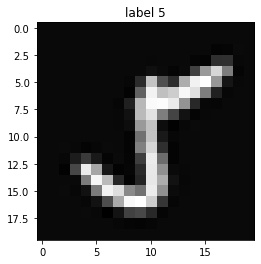

In [ ]:
# tester une image
c= 3
y_pred[c]
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Conclusion
- Les résultats des fonctions que nous avons defini sont les mêmes que celles des fonctions prédéfinies de la librairie **sklearn** 

- D'aprés la matrice de confusion et des metrics de classification le modèle obtenu est tres performant.
la Precision, le Rappel et la specifité sont tous > 0.85 et le taux de faux positif FP est egalement tres bas < 0.15 ce qui confirme que notre modèle est tres performant et qu'il a bien été entrainé
-Le modèle MVS est legerement moins bien que le modèle Knn

# Méthode 2: Arbres de décision


In [ ]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

In [ ]:
test(Ytt, y_pred)


-Matrice de confusion : 
 [[296  12   4  16   8   3   4   6   2   0]
 [ 10 234  10  14   8  21   7  23   7  20]
 [ 13  24 218   3  49   5   9  20  13   4]
 [  7  12   1 254   6  17   7  15  16   3]
 [  7  22  32  12 221  16   6  11   9  15]
 [  3  15   1  13  20 265   0  15   3   8]
 [  3  10   2  11   5   4 290   6  18   1]
 [  8  24  28   8  32   9   2 223  11   5]
 [  4  12  13  28  21   6  28   4 230   5]
 [  0  10   2   2   8   3   8  11   3 307]]

-Precision :  [0.84330484 0.624      0.70096463 0.70360111 0.58465608 0.75931232
 0.8033241  0.66766467 0.73717949 0.83423913]

-Rappel :  [0.84330484 0.66101695 0.60893855 0.75147929 0.62962963 0.77259475
 0.82857143 0.63714286 0.65527066 0.86723164]

-Taux de FP :  [0.15669516 0.376      0.29903537 0.29639889 0.41534392 0.24068768
 0.1966759  0.33233533 0.26282051 0.16576087]

-Specificite :  [0.98253414 0.95518118 0.97040102 0.96616066 0.9501429  0.97339246
 0.97746032 0.9647619  0.97395999 0.9806103 ]


In [ ]:
test_sklearn(Ytt, y_pred)


-Matrice de confusion sklearn : 
 [[296  12   4  16   8   3   4   6   2   0]
 [ 10 234  10  14   8  21   7  23   7  20]
 [ 13  24 218   3  49   5   9  20  13   4]
 [  7  12   1 254   6  17   7  15  16   3]
 [  7  22  32  12 221  16   6  11   9  15]
 [  3  15   1  13  20 265   0  15   3   8]
 [  3  10   2  11   5   4 290   6  18   1]
 [  8  24  28   8  32   9   2 223  11   5]
 [  4  12  13  28  21   6  28   4 230   5]
 [  0  10   2   2   8   3   8  11   3 307]]

-Precision sklearn:  [0.84330484 0.624      0.70096463 0.70360111 0.58465608 0.75931232
 0.8033241  0.66766467 0.73717949 0.83423913]

-Rappel sklearn :  [0.84330484 0.66101695 0.60893855 0.75147929 0.62962963 0.77259475
 0.82857143 0.63714286 0.65527066 0.86723164]


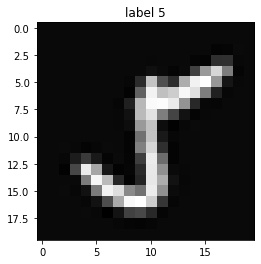

In [ ]:
# tester une image
c= 3
y_pred[c]
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Conclusion
- Les resultats des fonctions que nous avons defini sont les memes que celle des fonctions prédéfinies de la librairie sklearn 

- D'apres la matrice de confusion et des metrics de classification le modèle obtenu est acceptable.
-la Precision, le Rappel et la specifité sont tous > 0.58 et le taux de faux positif FP  < 0.42 ce qui confirme que notre modèle n'est pas mauvais mais qu'il est egalement loin d'etre fiable


# Méthode 3: RN 
Réseaux de neurones Perceptron

In [ ]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=25, max_iter=100000, solver='sgd')

In [ ]:
# Choisir un image de test 
c=3

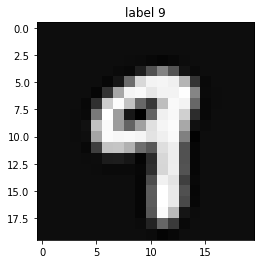

In [ ]:
c= 2

a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

In [ ]:
# pour ROC, il faudra les probabilités:
model.predict_proba([Xtt[c,:]])

array([[0.03301864, 0.10711458, 0.10337616, 0.11419698, 0.10293252,
        0.11180319, 0.10995767, 0.10153478, 0.10962786, 0.10643761]])

In [ ]:
model.predict([Xtt[c,:]])

array([4])

In [ ]:
y_pred = model.predict(Xtt)

In [ ]:
test(Ytt, y_pred)


-Matrice de confusion : 
 [[338   0   0  10   0   0   0   3   0   0]
 [  4   0   0 347   0   0   0   3   0   0]
 [  1   0   0 356   0   0   0   1   0   0]
 [  1   0   0 336   0   0   0   1   0   0]
 [  2   0   0 348   0   0   0   1   0   0]
 [  0   0   0 342   0   0   0   1   0   0]
 [  8   0   0 336   0   0   0   6   0   0]
 [  2   0   0 347   0   0   0   1   0   0]
 [  6   0   0 345   0   0   0   0   0   0]
 [  0   0   0 354   0   0   0   0   0   0]]

-Precision :  [0.93370166        nan        nan 0.1076578         nan        nan
        nan 0.05882353        nan        nan]

-Rappel :  [0.96296296 0.         0.         0.99408284 0.         0.
 0.         0.00285714 0.         0.        ]

-Taux de FP :  [0.06629834        nan        nan 0.8923422         nan        nan
        nan 0.94117647        nan        nan]

-Specificite :  [0.99237853 1.         1.         0.11922834 1.         1.
 1.         0.99492063 1.         1.        ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
test_sklearn(Ytt, y_pred)


-Matrice de confusion sklearn : 
 [[338   0   0  10   0   0   0   3   0   0]
 [  4   0   0 347   0   0   0   3   0   0]
 [  1   0   0 356   0   0   0   1   0   0]
 [  1   0   0 336   0   0   0   1   0   0]
 [  2   0   0 348   0   0   0   1   0   0]
 [  0   0   0 342   0   0   0   1   0   0]
 [  8   0   0 336   0   0   0   6   0   0]
 [  2   0   0 347   0   0   0   1   0   0]
 [  6   0   0 345   0   0   0   0   0   0]
 [  0   0   0 354   0   0   0   0   0   0]]

-Precision sklearn:  [0.93370166 0.         0.         0.1076578  0.         0.
 0.         0.05882353 0.         0.        ]

-Rappel sklearn :  [0.96296296 0.         0.         0.99408284 0.         0.
 0.         0.00285714 0.         0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Courbe roc pour chaque classe :

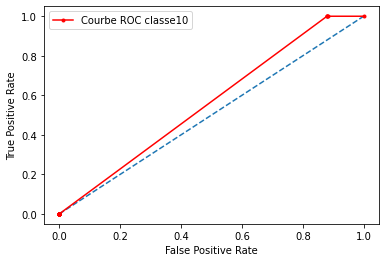

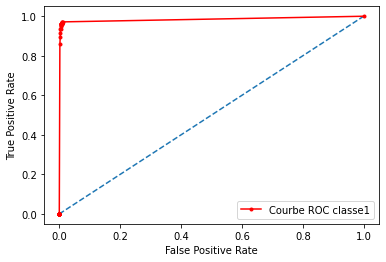

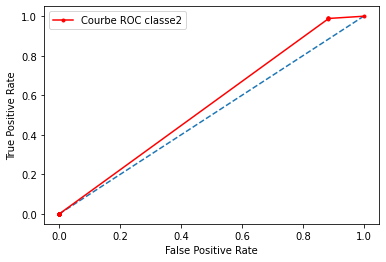

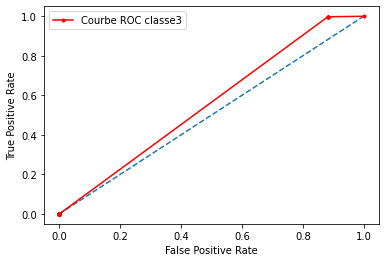

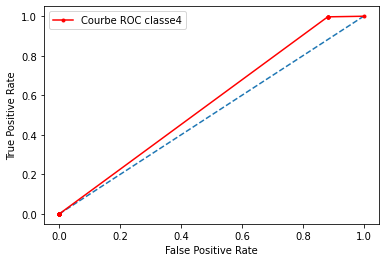

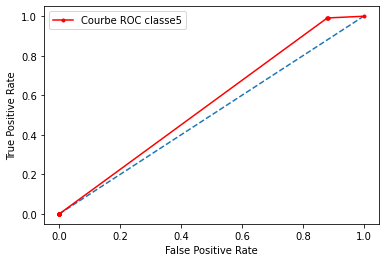

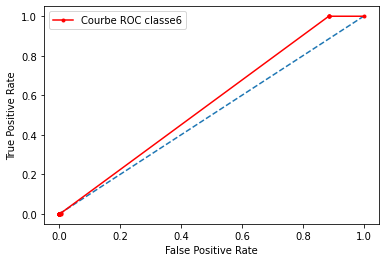

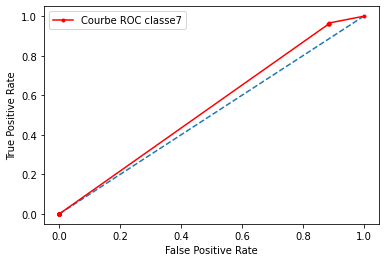

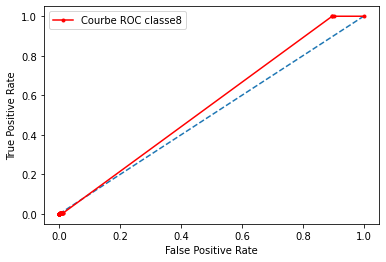

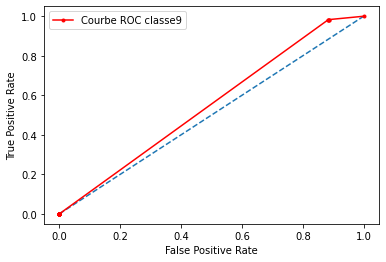

In [ ]:
for i in range(10):
  roc_curve(Xtt , Ytt ,i)

Afficher l'image testée

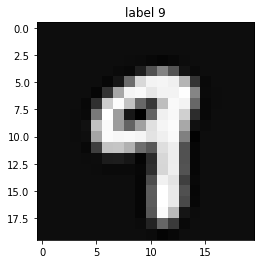

In [ ]:
c=2
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Conclusion
- Les resultats des fonctions que nous avons defini sont les memes que celle des fonctions prédéfinies de la librairie sklearn 

- D'apres la matrice de confusion et des metrics de classification le modèle obtenu est mauvais ce qui veut dire qu'il a été mal entrainé ou que les données d'entrainement ne sont pas suffisantes pour que le modèle puisse apprendre correctement.
-les resultats de la Precision, Rappel, Taux de FP et specificité montre bien que le modèle est mauvais( mis a part pour la class 1 ou le modèle est tres bien)
-les courbes ROC de chaque class montre bien que le modèle est mauvais dans la prediction des class (sauf pour la classe 1 ou le modèle est tres bien).


# Méthode 4: RNC
Réseaux de Neurones Convolutifs

In [ ]:
# reshape dataset to have a single channel
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)

Xt_rnc = Xt.reshape((Xt.shape[0], 20, 20, 1))
Xtt_rnc = Xtt.reshape((Xtt.shape[0], 20, 20, 1))

In [ ]:
# Recoder le valeurs
Yt_rnc = to_categorical(Yt)
Ytt_rnc = to_categorical(Ytt)

Xt_rncN = Xt_rnc.astype('float32')
Xtt_rncN = Xtt_rnc.astype('float32')

# normaliser
Xt_rncN = Xt_rncN / 255.0
Xtt_rncN = Xtt_rncN / 255.0

# definir le modèle RNC
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(20, 20, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compiler le modèle
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# evaluaer le modèle
_, acc = model.evaluate(Xtt_rncN, Ytt_rnc, verbose=0)


# Appliquer les métriques implementées pour voir le résultat